In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from pandas_datareader import data

In [3]:
n_tickers = input('Number of Stocks in your portfolio: ')

i = 0
tickers = []

while (i < int(n_tickers)):
    x = input('Ticker: ')
    tickers.append(x)
    i += 1

print(tickers)


['AAPL', 'GOOGL', 'FB', 'V']


In [4]:
start_date = "2016-01-01"
end_date = "2021-12-31"

stocks_data = pd.DataFrame()

for ticker in tickers:
    stocks_data[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)['Adj Close']
    
stocks_data = stocks_data.dropna()
stocks_data

,AAPL,GOOGL,FB,V
Date,,,,
2015-12-31,24.199884,778.010010,104.660004,74.393578
2016-01-04,24.220577,759.440002,102.220001,72.618866
2016-01-05,23.613625,761.530029,102.730003,73.165657
2016-01-06,23.151518,759.330017,102.970001,72.206375
2016-01-07,22.174417,741.000000,97.919998,70.786606
...,...,...,...,...
2021-12-27,180.100540,2958.129883,346.179993,217.276505
2021-12-28,179.061859,2933.739990,346.220001,217.695831
2021-12-29,179.151749,2933.100098,342.940002,217.815628


# ____________________________________________

In [5]:
risk_free_ann_ret_rate = 0.01

returns_ts = stocks_data.pct_change().dropna()
avg_daily_ret = returns_ts.mean()

returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252
avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

In [6]:
for n in stocks_data.columns:
    returns_ts['Excess_ret_' + n] = returns_ts[n] - returns_ts['RiskFree_Rate']

In [7]:
returns_ts

,AAPL,GOOGL,FB,V,RiskFree_Rate,Excess_ret_AAPL,Excess_ret_GOOGL,Excess_ret_FB,Excess_ret_V
Date,,,,,,,,,
2016-01-04,0.000855,-0.023869,-0.023314,-0.023856,0.00004,0.000815,-0.023908,-0.023353,-0.023895
2016-01-05,-0.025059,0.002752,0.004989,0.007530,0.00004,-0.025099,0.002712,0.004950,0.007490
2016-01-06,-0.019569,-0.002889,0.002336,-0.013111,0.00004,-0.019609,-0.002929,0.002297,-0.013151
2016-01-07,-0.042205,-0.024140,-0.049043,-0.019663,0.00004,-0.042244,-0.024179,-0.049083,-0.019702
2016-01-08,0.005288,-0.013617,-0.006025,-0.012332,0.00004,0.005248,-0.013656,-0.006065,-0.012372
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.022975,0.006738,0.032633,0.004663,0.00004,0.022935,0.006699,0.032594,0.004623
2021-12-28,-0.005767,-0.008245,0.000116,0.001930,0.00004,-0.005807,-0.008285,0.000076,0.001890
2021-12-29,0.000502,-0.000218,-0.009474,0.000550,0.00004,0.000462,-0.000258,-0.009513,0.000511


In [8]:

def sharpe_ratio(return_ts, ticker):

    sharpe_ratio = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret_' + ticker].std())*np.sqrt(252)

    return sharpe_ratio.round(3)


In [9]:
for n in stocks_data.columns:
    print(f"Sharpe Ratio {n} :\n", sharpe_ratio(returns_ts, n))

Sharpe Ratio AAPL :
 1.245
Sharpe Ratio GOOGL :
 0.935
Sharpe Ratio FB :
 0.733
Sharpe Ratio V :
 0.78


# ---------------------

In [19]:
log_returns = np.log(stocks_data / stocks_data.shift(1)) # Same as 1 + stocks_data.pct_change()
log_returns

,GOOGL,AAPL,FB,V
Date,,,,
2015-12-31,NaN,NaN,NaN,NaN
2016-01-04,-0.024158,0.000855,-0.023590,-0.024145
2016-01-05,0.002748,-0.025379,0.004977,0.007501
2016-01-06,-0.002893,-0.019764,0.002333,-0.013198
2016-01-07,-0.024436,-0.043121,-0.050287,-0.019859
...,...,...,...,...
2021-12-27,0.006716,0.022715,0.032112,0.004652
2021-12-28,-0.008279,-0.005784,0.000116,0.001928
2021-12-29,-0.000218,0.000502,-0.009519,0.000550


In [20]:
n = len(stocks_data.columns)

In [21]:
def gen_weights(n):
    weights = np.random.random(n)

    return weights / np.sum(weights)

In [22]:
def calculate_returns(weights, log_returns):
    # Annual log Returns

    return np.sum(log_returns.mean()*weights) * 252

In [23]:
def calculate_volatility(weights, log_returns):
    annualized_cov = np.dot(log_returns.cov()*252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)

    return np.sqrt(vol)

In [24]:
calculate_volatility(gen_weights(n), log_returns)

0.24128961564319604

In [33]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(100000):

    weights = gen_weights(n)
    mc_weights.append(weights)

    mc_portfolio_returns.append(calculate_returns(weights, log_returns))

    mc_portfolio_vol.append(calculate_volatility(weights, log_returns))



In [34]:
mc_sharpe_ratio = (np.array(mc_portfolio_returns) - 0 )/np.array(mc_portfolio_vol) # assuming rf =0

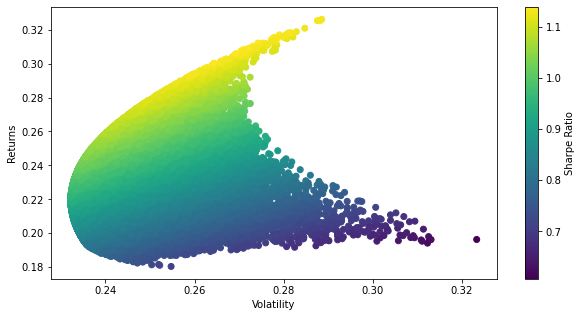

In [35]:
plt.figure(figsize = (10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.show()


In [29]:
mc_weights[np.argmax(mc_sharpe_ratio)]


array([0.16347213, 0.80645206, 0.02601791, 0.00405789])

['AAPL', 'ARKK', 'TSLA', 'AMZN', 'MSFT', 'GOOGL', 'JPM', 'NFLX']
array([0.02920397, 0.02217007, 0.07986235, 0.40333344, 0.281858  ,
       0.05538882, 0.04158916, 0.08659419])

array([0.16056466, 0.0022723 , 0.11224832, 0.33140994, 0.16490515,
       0.02462714, 0.02794456, 0.17602793])

# ------------------------------

In [ ]:
from scipy.optimize import minimize

# Max SH

In [ ]:
def function_to_minimize(weights):

    # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
    return -1 * ((calculate_returns(weights, log_returns) - 0 )/calculate_volatility(weights, log_returns)) # assuming rf =0


In [ ]:
bounds = tuple((0,1) for n in range(n))
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1}) # Read the documentation for minimize for more details
equal_weights = n * [1/n] #going to be our starting point then the function will look at either direction for minimum negative SG

In [ ]:
results = minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=sum_constraint)

In [ ]:
results

In [ ]:
# weights for optimal portfolio using historical data SR
results['x']
p = 0
for i in results['x']:
    print('Put',(i*100).round(3), "% in", stocks_data.columns[p])
    p += 1

# Min Var for given return

In [ ]:
required_return = 0.4

In [ ]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_returns) - required_return})

In [ ]:
bounds = tuple((0,1) for n in range(n))
equal_weights = n * [1/n] #going to be our starting point then the function will look at either direction for minimum negative SG

In [ ]:
def calculate_vol(weights):
    annualized_cov = np.dot(log_returns.cov()*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [ ]:
result = minimize(fun=calculate_vol,x0=equal_weights,bounds=bounds,constraints=constraints)

In [ ]:
result


In [ ]:
min_var_weights = result['x']

In [ ]:
min_var_weights

In [ ]:
calculate_vol(min_var_weights)

# Max return for given vol

In [ ]:
required_vol = 0.4

In [ ]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_vol(weights) - required_vol})

In [ ]:
bounds = tuple((0,1) for n in range(n))
equal_weights = n * [1/n] #going to be our starting point then the function will look at either direction for minimum negative SG

In [ ]:
def calculate_ret(weights):
    # Annual log Returns

    return -1 * np.sum(log_returns.mean()*weights) * 252

In [ ]:
result = minimize(fun=calculate_ret,x0=equal_weights,bounds=bounds,constraints=constraints)

In [ ]:
result

In [ ]:
calculate_ret(result['x']) * -1

In [ ]:
given_ret = 0.3
given_vol = 0.4

In [ ]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_vol(weights) - given_vol},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_returns) - given_ret})

In [ ]:
bounds = tuple((0,1) for n in range(n))
equal_weights = n * [1/n] #going to be our starting point then the function will look at either direction for minimum negative SG

In [ ]:
def function_to_minimize(weights):

    # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
    return -1 * ((calculate_returns(weights, log_returns) - 0 )/calculate_volatility(weights, log_returns)) # assuming rf =0


In [ ]:
results = minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=constraints)

In [ ]:
results